# CNN model

## 1.Importing the Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

### The path of  the data

In [2]:
# my_data_dir = '/Users/kai-derwang/Desktop/X-ray/chest_xray'
my_data_dir = '/Users/b5061/Desktop/Sinica/chest_xray/'

In [3]:
os.listdir(my_data_dir)

['test', 'train', 'val']

In [4]:
train_path = my_data_dir + '/train'
test_path = my_data_dir + '/test'
val_path = my_data_dir + '/val'

In [5]:
os.listdir(train_path)

['NORMAL', 'PNEUMONIA']

In [6]:
os.listdir(test_path)

['NORMAL', 'PNEUMONIA']

In [7]:
os.listdir(val_path)

['NORMAL', 'PNEUMONIA']

### Visualize single image

In [8]:
os.listdir(train_path + '/NORMAL')[0]

'IM-0115-0001.jpeg'

In [9]:
normal_example = train_path + '/NORMAL' + '/NORMAL2-IM-0927-0001.jpeg'

In [10]:
normal_example = imread(normal_example)
normal_example

array([[ 0, 23, 24, ...,  0,  0,  0],
       [ 0,  5, 23, ...,  0,  0,  0],
       [ 1,  0, 26, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [11]:
normal_example.max()

255

In [12]:
normal_example.min()

0

In [13]:
# height, width
normal_example.shape 

(2234, 2359)

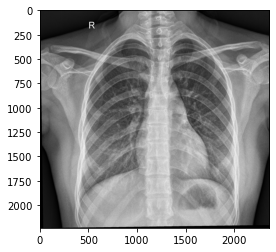

In [14]:
plt.imshow(normal_example,cmap='gray')

In [15]:
os.listdir(train_path + '/PNEUMONIA')[30]

'person1019_virus_1707.jpeg'

In [16]:
abnormal_example = train_path + '/PNEUMONIA' + '/person437_bacteria_1887.jpeg'

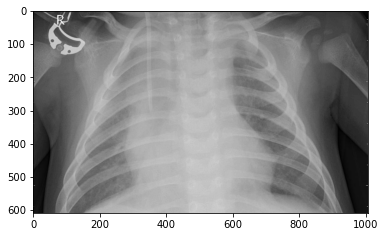

In [17]:
plt.imshow(imread(abnormal_example),cmap='gray') 

### Check how many images are there

In [18]:
len(os.listdir(train_path+'/NORMAL'))

1341

In [19]:
len(os.listdir(train_path+'/PNEUMONIA'))

3875

In [20]:
len(os.listdir(test_path+'/NORMAL'))

234

In [21]:
len(os.listdir(test_path+'/PNEUMONIA'))

390

In [22]:
len(os.listdir(val_path+'/NORMAL'))

8

In [23]:
len(os.listdir(val_path+'/PNEUMONIA'))

8

## 2.Data Preprocessing

In [24]:
train_gen= ImageDataGenerator(rescale=1.0/255.0)
val_gen = ImageDataGenerator(rescale=1.0/255.0)
test_gen = ImageDataGenerator(rescale=1.0/255.0)

## 3.Building the Model

In [25]:
model = Sequential()

# 1st Block 
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(3,3) ,input_shape=(224,224,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Block
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flatten and Fully Connected Layer
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))


# Sigmoid Classifier
model.add(Dense(1))
model.add(Activation('sigmoid'))


# compile model 
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 32)        4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 18, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2592)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               2

## 4.Training the Model

In [27]:
batch_size=250

train_img_gen = train_gen.flow_from_directory(train_path,classes =('NORMAL','PNEUMONIA'),class_mode='binary',batch_size=batch_size, target_size=(224, 224), color_mode='grayscale')
valid_img_gen = val_gen.flow_from_directory(val_path,classes =('NORMAL','PNEUMONIA'),class_mode='binary',batch_size=batch_size, target_size=(224, 224),color_mode='grayscale')
test_img_gen = test_gen.flow_from_directory(test_path,classes =('NORMAL','PNEUMONIA'),class_mode='binary',batch_size=batch_size, target_size=(224, 224),color_mode='grayscale')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [28]:
train_img_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [29]:
epochs=10

model.fit_generator(train_img_gen,
                    validation_data=test_img_gen, 
                    epochs=epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
21/21 [==============================] - 55s 3s/step - loss: 0.3989 - accuracy: 0.8324 - val_loss: 0.6216 - val_accuracy: 0.6250
Epoch 2/10
21/21 [==============================] - 46s 2s/step - loss: 0.1530 - accuracy: 0.9431 - val_loss: 0.6154 - val_accuracy: 0.6250
Epoch 3/10
21/21 [==============================] - 46s 2s/step - loss: 0.1001 - accuracy: 0.9615 - val_loss: 0.5862 - val_accuracy: 0.6250
Epoch 4/10
21/21 [==============================] - 46s 2s/step - loss: 0.0737 - accuracy: 0.9732 - val_loss: 0.5669 - val_accuracy: 0.6346
Epoch 5/10
21/21 [==============================] - 46s 2s/step - loss: 0.0574 - accuracy: 0.9781 - val_loss: 0.5525 - val_accuracy: 0.6378
Epoch 6/10
21/21 [==============================] - 46s 2s/step - loss: 0.0490 - accuracy: 0.9810 - val_loss: 0.5151 - val_accuracy: 0.6843
Epoch 7/10
21/21 [==============================] - 49s 2s/step - loss: 0.0454 - acc

In [30]:
# model.layers[0].get_weights()[0][:,:,:,0]

In [31]:
model.save('cnn_model.h5')

## 5.Evaluating the Model

In [32]:
losses = pd.DataFrame(model.history.history)

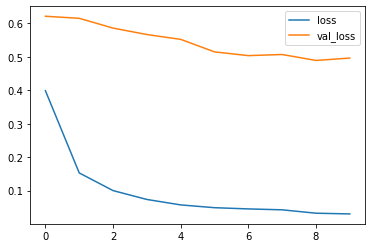

In [33]:
losses[['loss','val_loss']].plot()

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
pred_probabilities = model.predict_generator(test_img_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [36]:
pred_probabilities

array([[0.9524617 ],
       [0.5364416 ],
       [0.4799638 ],
       [0.6958033 ],
       [0.90637827],
       [0.7647898 ],
       [0.84681606],
       [0.7658475 ],
       [0.66470623],
       [0.7954879 ],
       [0.8896383 ],
       [0.79523504],
       [0.9728648 ],
       [0.8997099 ],
       [0.9268017 ],
       [0.9036372 ],
       [0.413605  ],
       [0.83570063],
       [0.90594405],
       [0.7204337 ],
       [0.767765  ],
       [0.90586185],
       [0.9417292 ],
       [0.82785296],
       [0.85383475],
       [0.506002  ],
       [0.7918969 ],
       [0.95597064],
       [0.8974557 ],
       [0.6265926 ],
       [0.93808955],
       [0.93154395],
       [0.88347316],
       [0.62472427],
       [0.73887324],
       [0.89407575],
       [0.9472027 ],
       [0.8925219 ],
       [0.7269545 ],
       [0.6771599 ],
       [0.75118613],
       [0.5746575 ],
       [0.8839396 ],
       [0.47493148],
       [0.91193235],
       [0.6275349 ],
       [0.4860456 ],
       [0.771

In [37]:
y_true = test_img_gen.classes

In [38]:
predictions = pred_probabilities > 0.5

In [39]:
predictions

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [40]:
confusion_matrix(y_true,predictions)

array([[ 16, 218],
       [ 26, 364]], dtype=int64)

## 6.Predicting Single Image

In [41]:
os.listdir(test_path + '/PNEUMONIA')[30]

'person10_virus_35.jpeg'

In [42]:
example = test_path + '/PNEUMONIA' + '/person86_bacteria_429.jpeg'
example

'/Users/b5061/Desktop/Sinica/chest_xray//test/PNEUMONIA/person86_bacteria_429.jpeg'

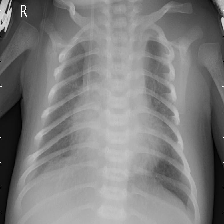

In [43]:
my_image = image.load_img(example,color_mode='grayscale',target_size=(224,224,1))
my_image

In [44]:
type(my_image)

PIL.Image.Image

In [45]:
my_image = image.img_to_array(my_image)

In [46]:
type(my_image)

numpy.ndarray

In [47]:
my_image.shape

(224, 224, 1)

In [48]:
my_image = np.expand_dims(my_image, axis=0)
my_image.shape

(1, 224, 224, 1)

In [49]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [50]:
test_img_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}